# Example plots using the Dronninglund data for 2014

This Jupyter Notebook shows how to visually represent the energy content and temperatures of the Dronninglund Pit Thermal Energy Storage (PTES).

In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

<br> Read the quality controlled dataset with the derived flow directions (*Dronninglund_treated_data_and_flow_rates_2014.csv*) into a dataframe.

In [2]:
# Read data from pickle to dataframe
df = pd.read_csv('Dronninglund_treated_data_and_flow_rates_2014.csv', index_col=[0], parse_dates=True)
df

,SO.DA.ET.422.5,SO.DA.HT.422.1.F,SO.DA.HT.422.1.T,SO.DA.HT.422.2.F,SO.DA.HT.422.2.T,SO.DA.LT.421,T_00.5,T_01.5,T_02.5,T_03.5,...,Q_ch_bot_calc,Q_dis_bot_calc,FR_top_c,FR_mid_c,FR_bot_c,Q_top,Q_mid,Q_bot,Q_ch_dir,Q_dis_dir
2014-01-01 01:00:00+01:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,-0.000000,NaN,NaN,NaN,NaN,NaN,NaN,0.0,-0.000000
2014-01-01 01:10:00+01:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,-0.000000,NaN,NaN,NaN,NaN,NaN,NaN,0.0,-0.000000
2014-01-01 01:20:00+01:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,-0.000000,NaN,NaN,NaN,NaN,NaN,NaN,0.0,-0.000000
2014-01-01 01:30:00+01:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,-0.000000,NaN,NaN,NaN,NaN,NaN,NaN,0.0,-0.000000
2014-01-01 01:40:00+01:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,-0.000000,NaN,NaN,NaN,NaN,NaN,NaN,0.0,-0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2014-12-31 23:10:00+01:00,11.0,100.0,4.7,9.0,42.5,16.013,14.7,14.5,14.9,14.9,...,0.0,0.269825,-1.0,-1.0,1.0,-0.294483,-0.072495,0.098110,0.0,0.268868
2014-12-31 23:20:00+01:00,11.0,100.0,4.8,9.0,42.4,16.013,14.7,14.5,14.9,14.9,...,0.0,0.269305,-1.0,-1.0,1.0,-0.292766,-0.073861,0.097944,0.0,0.268683
2014-12-31 23:30:00+01:00,11.0,100.0,4.9,9.0,42.5,16.013,14.7,14.5,14.9,14.9,...,0.0,0.267048,-1.0,-1.0,1.0,-0.291049,-0.074456,0.099249,0.0,0.266256
2014-12-31 23:40:00+01:00,11.0,100.0,5.0,9.0,42.5,16.013,14.7,14.5,14.9,14.9,...,0.0,0.266918,-1.0,-1.0,1.0,-0.291049,-0.074158,0.098912,0.0,0.266295


<br> Define functions for the density and specific heat of water as a function of temperature.

In [3]:
def density_water(T):
    '''Calculates density (rho) of water in kg/m^3 based on fluid temperature (T) nearest the flow meter in degrees Celsius'''
    rho = (999.85+5.332*(10**-2)*T-7.564*(10**-3)*(T**2)+4.323*(10**-5)*(T**3)-1.673*(10**-7)*(T**4)+2.447*(10**-10)*(T**5))
    return(rho)

def specific_heat_water(T):
    '''Calculates specific heat (cp) of water in J/(kg K) based on mean fluid temperature (T) in degrees Celsius'''
    cp = (4.2184-2.8218*(10**-3)*T+7.3478*(10**-5)*(T**2)-9.4712*(10**-7)*(T**3)+7.2869*(10**-9)*(T**4)-2.8098*(10**-11)*(T**5)
          +4.4008*(10**-14)*(T**6))*1000
    return(cp)

<br>

## Energy content plot

It is often useful to plot the energy content of a storage, in order to visualize the charge and discharge profile.

Due to the geometry of the storage, it is first necessary to calculate the volume of each layer in the storage (each layer corresponds to the volume surrounding the 32 temperature sensors).

The shape of the storage is a truncated pyramid (frustrum). The volume of each layer can be calculated based on the layer height, the upper side length (*a*) and the lower side length (*b*).

In [4]:
a = 90.4 # side length of top surface
layer_height = 0.5 # water layer height

volume_per_layer = []
for _ in range(1, 33):
    b = a - 2 # the slope is 1:2 thus giving 1 m length at each side
    layer_volume = layer_height / 3 *(a**2 + a*b + b**2)
    volume_per_layer.append(layer_volume)
    a = b

volume_per_layer = pd.Series(volume_per_layer).round(0)

<br> Define a list of the water temperature sensors according to the "volume_per_layer" series.

In [5]:
water_sensors = ['T_{:04.1f}'.format(height) for height in np.linspace(16, 0.5, 32)]
print(water_sensors)

['T_16.0', 'T_15.5', 'T_15.0', 'T_14.5', 'T_14.0', 'T_13.5', 'T_13.0', 'T_12.5', 'T_12.0', 'T_11.5', 'T_11.0', 'T_10.5', 'T_10.0', 'T_09.5', 'T_09.0', 'T_08.5', 'T_08.0', 'T_07.5', 'T_07.0', 'T_06.5', 'T_06.0', 'T_05.5', 'T_05.0', 'T_04.5', 'T_04.0', 'T_03.5', 'T_03.0', 'T_02.5', 'T_02.0', 'T_01.5', 'T_01.0', 'T_00.5']


<br> Calculate the energy content per PTES layer and find the total energy content of the storage.

In [6]:
T_ref = 10 # Reference temperature (lowest temperature observed in the PTES)

# Calculate the energy content per volume
heat_per_volume = df[water_sensors].apply(density_water) * df[water_sensors].apply(specific_heat_water) * (df[water_sensors]-T_ref)

# Calculate the energy content per layer
heat_per_layer = heat_per_volume.multiply(list(volume_per_layer), axis='columns').divide(3600*10**6) # MWh/layer

# Sum them up for the total energy content of the storage
Q_storage = heat_per_layer.sum(axis='columns')

<br> Plot the energy content of the PTES at the end of each month.

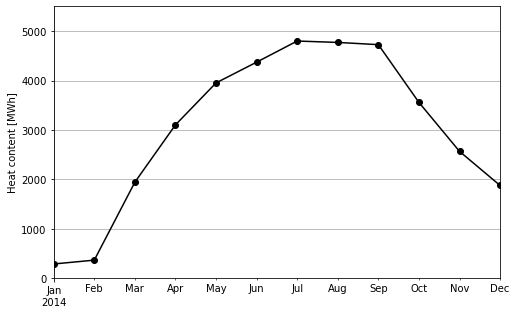

In [7]:
fig, axes = plt.subplots(figsize=(8,5))

Q_storage.resample('1M').last().plot(ax=axes, style='k-o', grid=True)

axes.set_ylabel('Heat content [MWh]')
axes.set_ylim(0, 5500);

<br> Plot for monthly charged/discharged energy and energy content.

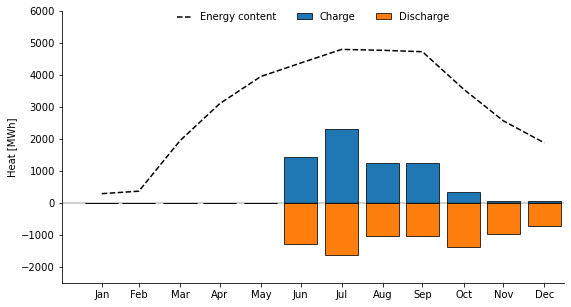

In [8]:
freq = '1M'
dfr = df.resample(freq).sum()

bar_width = pd.Timedelta(days=25)
x = dfr.index
lw = 0.75

fig, ax = plt.subplots(figsize=(9, 5))
ax.bar(x=x, height=dfr['Q_ch_net'], width=bar_width, label='Charge', lw=lw, edgecolor='k')
ax.bar(x=x, height=-dfr['Q_dis_net'], width=bar_width, label='Discharge', lw=lw, edgecolor='k')
ax.set_ylabel('Heat [MWh]')

# Hide the right and top spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# Plot energy content
ax.plot(x, Q_storage.resample(freq).last()[dfr.index], c='k', linestyle='--', label='Energy content')

# Format x-ticks and set x-limit
ax.set_xticks(pd.date_range('2014-1-1', freq='M', periods=13))
ax.xaxis.set_major_formatter(matplotlib.dates.DateFormatter('%b'))
ax.set_xlim(pd.Timestamp(2014,1,1), pd.Timestamp(2015,1,15))
ax.set_xlabel('')

ax.legend(loc='upper center', ncol=3, frameon=False, handleheight=0.5, handlelength=1.5, bbox_to_anchor=[0.5,1.03])
ax.set_ylim(-2500, 6000)

ax.axhline(0, c='k', lw=0.35);

<br>

## Water temperature plot

Another very useful illustration is a plot of the water temperature inside the storage. This not only illustrates the energy content, but also the stratification of the storage.

In [9]:
# Create a new dataframe by taking the average temperature of 2 layers (end up with 16 water layers)
df_water_sensors = df[water_sensors]
df_water_sensors.columns = [int(float(c[2:])-0.5) for c in water_sensors]
df_water_sensors = df_water_sensors.groupby(df_water_sensors.columns, axis='columns').mean()
df_water_sensors = df_water_sensors.resample('1h').mean()
df_water_sensors.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
2014-01-01 01:00:00+01:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-01-01 02:00:00+01:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-01-01 03:00:00+01:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-01-01 04:00:00+01:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-01-01 05:00:00+01:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<br> Plot of the storage temperatures.

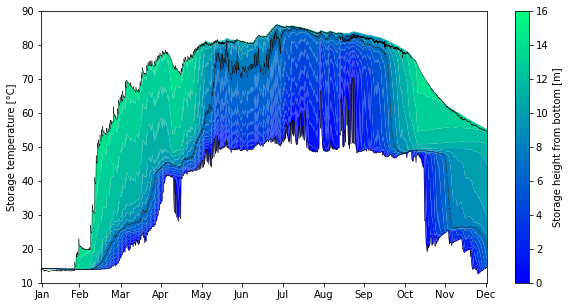

In [10]:
cmap = matplotlib.cm.get_cmap('winter') #  select a colormap for the plot from https://matplotlib.org/stable/tutorials/colors/colormaps.html

df_water_sensors.copy() # make a copy of the dataframe to use it for the plot

fig, ax = plt.subplots(figsize=(10,5))

# Plot color between two temperature sensors
for i in range(df_water_sensors.shape[1]-1):
    c1 = df_water_sensors.columns[i]
    c2 = df_water_sensors.columns[i+1]
    ax.fill_between(df_water_sensors.index, df_water_sensors[c2], df_water_sensors[c1],
                where=df_water_sensors[c2] >= df_water_sensors[c1],
                facecolor=cmap(i/len(df_water_sensors.columns))
                   )
                
cax, _ = matplotlib.colorbar.make_axes(ax) 
cb2 = matplotlib.colorbar.ColorbarBase(
    cax, cmap=cmap, norm=plt.Normalize(0,16),
    label='Storage height from bottom [m]')

ax.plot(df_water_sensors[df_water_sensors.columns[0]], c='k', lw=0.4)
ax.plot(df_water_sensors[df_water_sensors.columns[int(df_water_sensors.shape[1]/2)]], c='k', lw=0.4)
ax.plot(df_water_sensors[df_water_sensors.columns[-1]], c='k', lw=0.4)

# Format y-label and set y-limit
ax.set_ylabel('Storage temperature [°C]')
ax.set_ylim(10, 90)

# Format x-axis labels and set x-limit
ax.set_xticks(pd.date_range('2014-1-1', freq='M', periods=13))
ax.xaxis.set_major_formatter(matplotlib.dates.DateFormatter('%b'))
ax.set_xlim(pd.Timestamp(2014,1,30), pd.Timestamp(2015,1,1))
ax.set_xlabel('');

<br>

## Storage temperature profile plot

Another way to visualize the stratification of the storage is to plot the vertical temperature profile for multiple periods of the year.

Text(0.08, 0.86, 'Top')

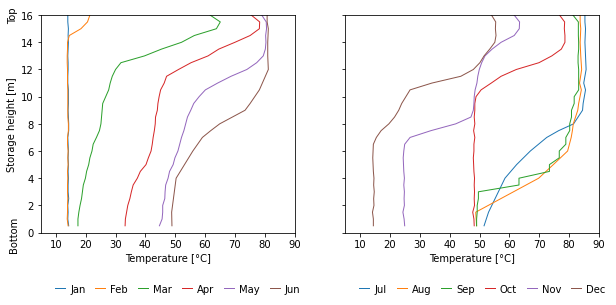

In [11]:
# Get the height of the sensors for plotting
water_sensors_heights = [float(c.split('_')[-1]) for c in water_sensors]

# Charge period from February to July
date_range_charge = pd.date_range(start='2014-01-01 00:00+0100', periods=6, freq='1M')

# Discharge period August to January
date_range_discharge = pd.date_range(start='2014-07-01 00:00+0100', periods=6, freq='1M')


fig, axes = plt.subplots(ncols=2, sharey=True, figsize=(10,4))

df_vertical_ch = df.loc[date_range_charge, water_sensors].T
df_vertical_ch.columns = [c.strftime('%b') for c in df_vertical_ch.columns]
df_vertical_ch['height'] = water_sensors_heights
for month in df_vertical_ch.columns[:-1]:
    df_vertical_ch.plot(x=month, y='height', ax=axes[0], label=month, lw=1)

df_vertical_dis = df.loc[date_range_discharge, water_sensors].T
df_vertical_dis.columns = [c.strftime('%b') for c in df_vertical_dis.columns]
df_vertical_dis['height'] = water_sensors_heights
for month in df_vertical_dis.columns[:-1]:
    df_vertical_dis.plot(x=month, y='height', ax=axes[1], label=month, lw=1)

axes[0].set_xlabel('Temperature [°C]'), axes[1].set_xlabel('Temperature [°C]')
axes[0].set_ylabel('Storage height [m]')
axes[0].set_ylim(0,16)

for ax in axes:
    ax.legend(ncol= 6, loc=(0.04, -0.3), frameon=False, handlelength=1, columnspacing=1, handletextpad=0.5)
    xticks = np.arange(0, 100, 10)
    ax.set_xticks(xticks)
    ax.set_xlim(5, 90)

# Add description of the min/max y-limits
plt.gcf().text(0.08, 0.065, 'Bottom', rotation=90)
plt.gcf().text(0.08, 0.86, 'Top', rotation=90)

<br>

## Lid measurements

Furthermore, several measurements were made of the conditions inside the lid.

The following sensors concerning the lid conditiosn are available:

In [12]:
# Make dictionary for renaming the sesnors
lid_sensors_dict = {
                    'SO.DA.HT.422.1.F':'lid_humidity_1',
                    'SO.DA.HT.422.1.T':'lid_temp_1',
                    'SO.DA.HT.422.2.F':'lid_humidity_2',
                    'SO.DA.HT.422.2.T':'lid_temp_2',
                    'SO.DA.TT.422.3':'temp_above_lid',
                    'SO.DA.TT.422.4':'temp_below_lid',
                    'SO.DA.ET.422.5':'heat_flux'}

df = df.rename(columns=lid_sensors_dict)

<br> First, it is necessary to remove periods of bad data which occur for the humidity and temperature sensors.

In [13]:
# Humidity sensors
df.loc[df['lid_humidity_1']==0, 'lid_humidity_1'] = np.nan
df.loc[:'2014-03-15', 'lid_humidity_2'] = np.nan

# Temperature sensors had some spikes at -20 degC
df.loc[df['lid_temp_1']==-20, 'lid_temp_1'] = np.nan
df.loc[df['lid_temp_2']==-20, 'lid_temp_2'] = np.nan
df.loc[df['temp_above_lid']==-20, 'temp_above_lid'] = np.nan
df.loc[df['temp_below_lid']==-20, 'temp_below_lid'] = np.nan

# Remove bad values at start of measurement period
df.loc[:'2014-02-01', ['temp_above_lid', 'temp_below_lid', 'lid_temp_2']] = np.nan

<br> Now, the humidity inside the lid construction can be plotted:

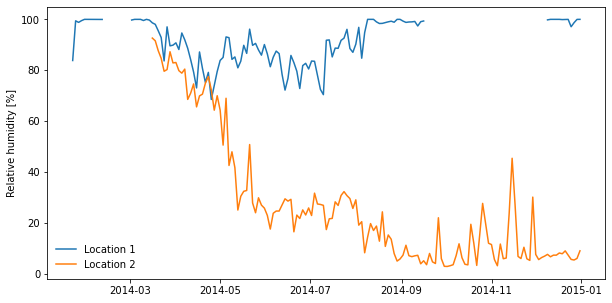

In [14]:
fig, ax = plt.subplots(figsize=(10,5))
ax.plot(df['lid_humidity_1'].resample('2d').mean(), label='Location 1')
ax.plot(df['lid_humidity_2'].resample('2d').mean(), label='Location 2')
ax.set_ylabel('Relative humidity [%]')
ax.legend(frameon=False);

Note, the specific placement of location 1 and 2 are described in the accompanying data article.

<br> The tempearture conditions inside the lid were also measured:

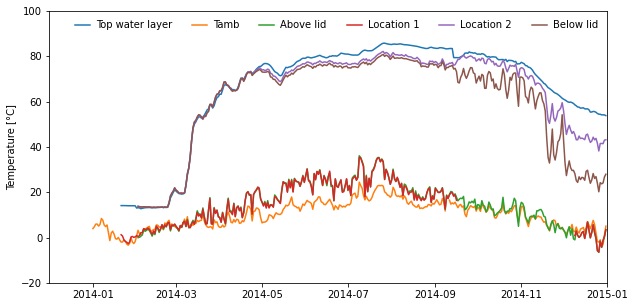

In [15]:
freq = '1d'  # 1 day averaging

fig, ax =plt.subplots(figsize=(10,5))
ax.plot(df['T_16.0'].resample(freq).mean(), label='Top water layer')
ax.plot(df['temp_dry'].resample(freq).mean(), label='Tamb')
ax.plot(df['temp_above_lid'].resample(freq).mean(), label='Above lid')
ax.plot(df['lid_temp_1'].resample(freq).mean(), label='Location 1')
ax.plot(df['lid_temp_2'].resample(freq).mean(), label='Location 2')
ax.plot(df['temp_below_lid'].resample(freq).mean(), label='Below lid')
ax.legend(ncol=6, frameon=False, handlelength=1.5, handletextpad=0.6)
ax.set_ylim(-20, 100)
ax.set_ylabel('Temperature [°C]')
ax.set_xlim(pd.Timestamp(2013,12,1), pd.Timestamp(2015,1,1));

<br> The following plot visualizes the heat flux through the lid as measured by a heat flux sensor.

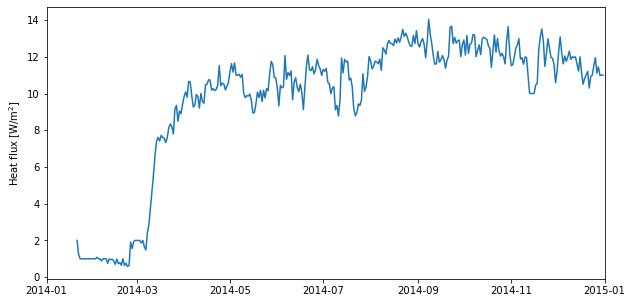

In [16]:
# Remove negative heat flux values
df.loc[df['heat_flux']<0, 'heat_flux'] = np.nan

freq = '1d' # set the frequency of the plot

# Plot of heat flux through the lid
fig, ax =plt.subplots(figsize=(10,5))
ax.plot(df['heat_flux'].resample(freq).mean())
ax.set_ylabel('Heat flux [W/m$^2$]')
ax.set_xlim(pd.Timestamp(2014,1,1), pd.Timestamp(2015,1,1));

<br> Plot of the overall heat loss coefficient (U-value) of the lid. The U-value was calculated using the measured heat flux through the lid, the temperature of the top water layer, and the ambient temperature.

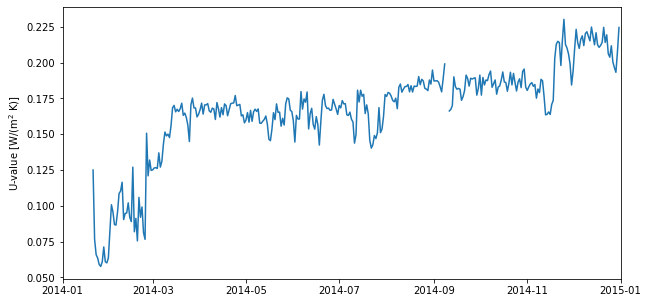

In [17]:
fig, ax = plt.subplots(figsize=(10,5))
ax.plot((df['heat_flux']/(df['T_16.0']-df['temp_dry'])).resample('1d').mean())
ax.set_ylabel('U-value [W/(m$^2$ K)]')
ax.set_xlim(pd.Timestamp(2014,1,1), pd.Timestamp(2015,1,1));

In [18]:
print('The average U-value for the lid during 2014 was: ', round((df['heat_flux']/(df['T_16.0']-df['temp_dry'])).mean(),3),' W/(m^2 K)')

The average U-value for the lid during 2014 was:  0.167  W/(m^2 K)
